![HankAaronBraves](http://i.cdn.turner.com/cnn/interactive/2014/04/us/hank-aaron-anniversary/media/images/AP7404080140.jpg "Everyone wants a good team!")

### EDA on Teams.csv from Sean Lahman data
* [SeanLahman.com](http://www.seanlahman.com/baseball-archive/statistics/ "Link Here")
* Team Stats 2016 to 1871.
* 2835 row entries and 48 columns.
* Released in February of each year.

In [1]:
cd ..

/Users/johnphillips/Desktop/DSI-Class-Stuff/BaseBall


In [2]:
%matplotlib inline

In [3]:
%run __init__.py

In [4]:
# Import some data from csv's and start eda
salaries = pd.read_csv('data/Salaries.csv', delimiter=',')
teams = pd.read_csv('data/Teams.csv', delimiter=',')

### Now let work with the teams.csv

In [5]:
teams.sample(7)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
178,1886,NL,DTN,DTN,NaN,2,126,NaN,87,36,...,NaN,0.928,Detroit Wolverines,Recreation Park,NaN,103,100,DTN,DTN,DTN
1704,1976,NL,PIT,PIT,E,2,162,81.0,92,70,...,142.0,0.975,Pittsburgh Pirates,Three Rivers Stadium,1025945.0,100,99,PIT,PIT,PIT
1242,1953,NL,PHI,PHI,NaN,3,156,78.0,83,71,...,161.0,0.975,Philadelphia Phillies,Connie Mack Stadium,853644.0,99,98,PHI,PHI,PHI
973,1936,NL,SLN,STL,NaN,2,155,77.0,87,67,...,134.0,0.974,St. Louis Cardinals,Sportsman's Park IV,448078.0,99,98,STL,SLN,SLN
1046,1941,AL,DET,DET,NaN,4,155,77.0,75,79,...,129.0,0.969,Detroit Tigers,Briggs Stadium,684915.0,110,110,DET,DET,DET
774,1924,AL,DET,DET,NaN,3,156,78.0,86,68,...,142.0,0.971,Detroit Tigers,Navin Field,1015136.0,98,97,DET,DET,DET
405,1902,NL,CIN,CIN,NaN,4,141,70.0,70,70,...,118.0,0.945,Cincinnati Reds,Palace of the Fans,217300.0,109,108,CIN,CIN,CIN


In [6]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 48 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS    

In [7]:
# Have a lot of isnull to work with!!

teams.isnull().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                 120
SB                 144
CS                 859
HBP               2325
SF                2325
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                 317
FP                   0
name                 0
park                34
attendance         279
BPF        

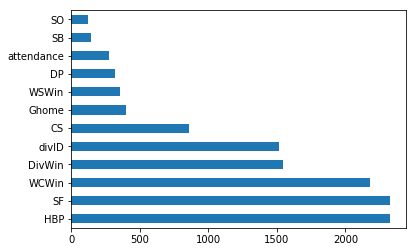

In [8]:
teams.isnull().sum().nlargest(12).plot(kind="barh")

In [9]:
# Taking a look at the columns ...
teams.columns

# WSWin and LgWin will be my important target columns.
# Need to make sure they are correctly formatted...

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')

In [10]:
teams['WSWin'].isnull().value_counts()

False    2478
True      357
Name: WSWin, dtype: int64

In [11]:
# There are many NaN's here.  ie: before World Series existed.  
# Questions: These are old old teams, different seasons, different game.  Does their data matter?
teams['WSWin'].fillna('N', inplace=True)

In [12]:
# Look at League Champions.
# Even back long ago, they still had League Championships... just not unified World Series

teams['LgWin'].isnull().value_counts()

False    2807
True       28
Name: LgWin, dtype: int64

In [13]:
teams['WSWin'].isnull().value_counts()

False    2835
Name: WSWin, dtype: int64

In [14]:
teams['LgWin'].fillna('N', inplace=True)

In [15]:
teams['LgWin'].isnull().value_counts()

False    2835
Name: LgWin, dtype: int64

### How many teams actually won the World Series?

In [16]:
teams['WSWin'].value_counts()

N    2718
Y     117
Name: WSWin, dtype: int64

In [20]:
print((117.0/2835)) # What % Yes?
print(2718.0/2835) # What % No?

0.0412698412698
0.95873015873


### Only 117 total Teams Won!
* Only 4.1% of Teams Won.
* While 95.8% of Teams didn't win.

### Same look at Leage Champions.

In [21]:
teams['LgWin'].value_counts()

N    2561
Y     274
Name: LgWin, dtype: int64

In [22]:
print((274.0/2835)) # What % Yes?
print(2561.0/2835)  # What % No?

0.0966490299824
0.903350970018


### Leage Champions are also a low percentage.
* Only 9.6% of Teams won LCS.
* Remaining 90.3% of teams are not so lucky.

### Now to fix the other Null Values!

In [23]:
# Fix for Numeric Columns
teams['HBP'].fillna(0, inplace=True)
teams['SF'].fillna(0, inplace=True)
teams['SB'].fillna(0, inplace=True)
teams['CS'].fillna(0, inplace=True)
teams['SO'].fillna(0, inplace=True)
teams['Ghome'].fillna(0, inplace=True)
teams['DP'].fillna(0, inplace=True)
teams['attendance'].fillna(0, inplace=True)

In [24]:
# Fix for Object Columns:
# Park, divID, lgID are not important for our analysis.  Dropping for now.
teams.drop(['park', 'divID', 'lgID', 'Rank', 'DivWin', 'WCWin'], axis=1, inplace=True)

### Now make Features for Batting Average (BA), On Base Percent (OBP), Slugging Percentage (SLG), and Win Percentage (WinP)
* What are these features?
    * BA: Batting Average
    * OBP: On Base Percentage
    * SLG: Slugging Percentage
    * OPS: On Base plus Slugging
    * WinP: Team Winning Percentage
    

* Why did I make these features?
    * BA: The metric everyone looks at to start.
    * OBP: Ability to get on base.
    * SLG: Ability to hit for power; total bases per at bat.
    * OPS: Sum of OBP and SLG.
    * WinP: The season wasn't always 160 games; better than only looking at Wins.

In [25]:
teams['BA'] = (teams['H'] / teams['AB']) # Calculate Batting Average
teams['OBP'] = (teams['H'] + teams['BB'] + teams['HBP'])/(teams['AB']+teams['BB']+teams['HBP']+teams['SF']) # Calculate OBP
teams['SLG'] = (teams['H'] + teams['2B'] + 2*teams['3B'] + 3*teams['HR'])/teams['AB'] # Calculate SLG
teams['OPS'] = teams['OBP'] + teams['SLG'] # Calculate OPS
teams['WinP'] = (teams['W'] / (teams['W'] + teams['L'])) # Calculate Win %

In [26]:
teams.head(12) #check to make sure new Features are in our DF.

,yearID,teamID,franchID,G,Ghome,W,L,LgWin,WSWin,R,...,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,BA,OBP,SLG,OPS,WinP
0,1871,BS1,BNA,31,0.0,20,10,N,N,401,...,103,98,BOS,BS1,BS1,0.310496,0.339385,0.422012,0.761397,0.666667
1,1871,CH1,CNA,28,0.0,19,9,N,N,302,...,104,102,CHI,CH1,CH1,0.270067,0.304936,0.373746,0.678682,0.678571
2,1871,CL1,CFC,29,0.0,10,19,N,N,249,...,96,100,CLE,CL1,CL1,0.276560,0.292079,0.391231,0.683310,0.344828
3,1871,FW1,KEK,19,0.0,7,12,N,N,137,...,101,107,KEK,FW1,FW1,0.238606,0.270860,0.293566,0.564426,0.368421
4,1871,NY2,NNA,33,0.0,16,17,N,N,302,...,90,88,NYU,NY2,NY2,0.287037,0.303410,0.349715,0.653125,0.484848
5,1871,PH1,PNA,28,0.0,21,7,Y,N,376,...,102,98,ATH,PH1,PH1,0.320062,0.343632,0.434817,0.778449,0.750000
6,1871,RC1,ROK,25,0.0,4,21,N,N,231,...,97,99,ROK,RC1,RC1,0.264479,0.290503,0.363900,0.654402,0.160000
7,1871,TRO,TRO,29,0.0,13,15,N,N,351,...,101,100,TRO,TRO,TRO,0.307692,0.333847,0.417468,0.751315,0.464286
8,1871,WS3,OLY,32,0.0,15,15,N,N,310,...,94,98,OLY,WS3,WS3,0.277162,0.301927,0.368810,0.670737,0.500000
9,1872,BL1,BLC,58,0.0,35,19,N,N,617,...,106,102,BAL,BL1,BL1,0.289984,0.297349,0.369953,0.667303,0.648148


### Plots of numerical columns

In [27]:
teams.columns

Index([u'yearID', u'teamID', u'franchID', u'G', u'Ghome', u'W', u'L', u'LgWin',
       u'WSWin', u'R', u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB',
       u'CS', u'HBP', u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV',
       u'IPouts', u'HA', u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro', u'BA', u'OBP', u'SLG', u'OPS', u'WinP'],
      dtype='object')

In [28]:
# Numeric Columns that I want to keep for plots:
teams_num = teams.select_dtypes(exclude=['object', 'category'])  

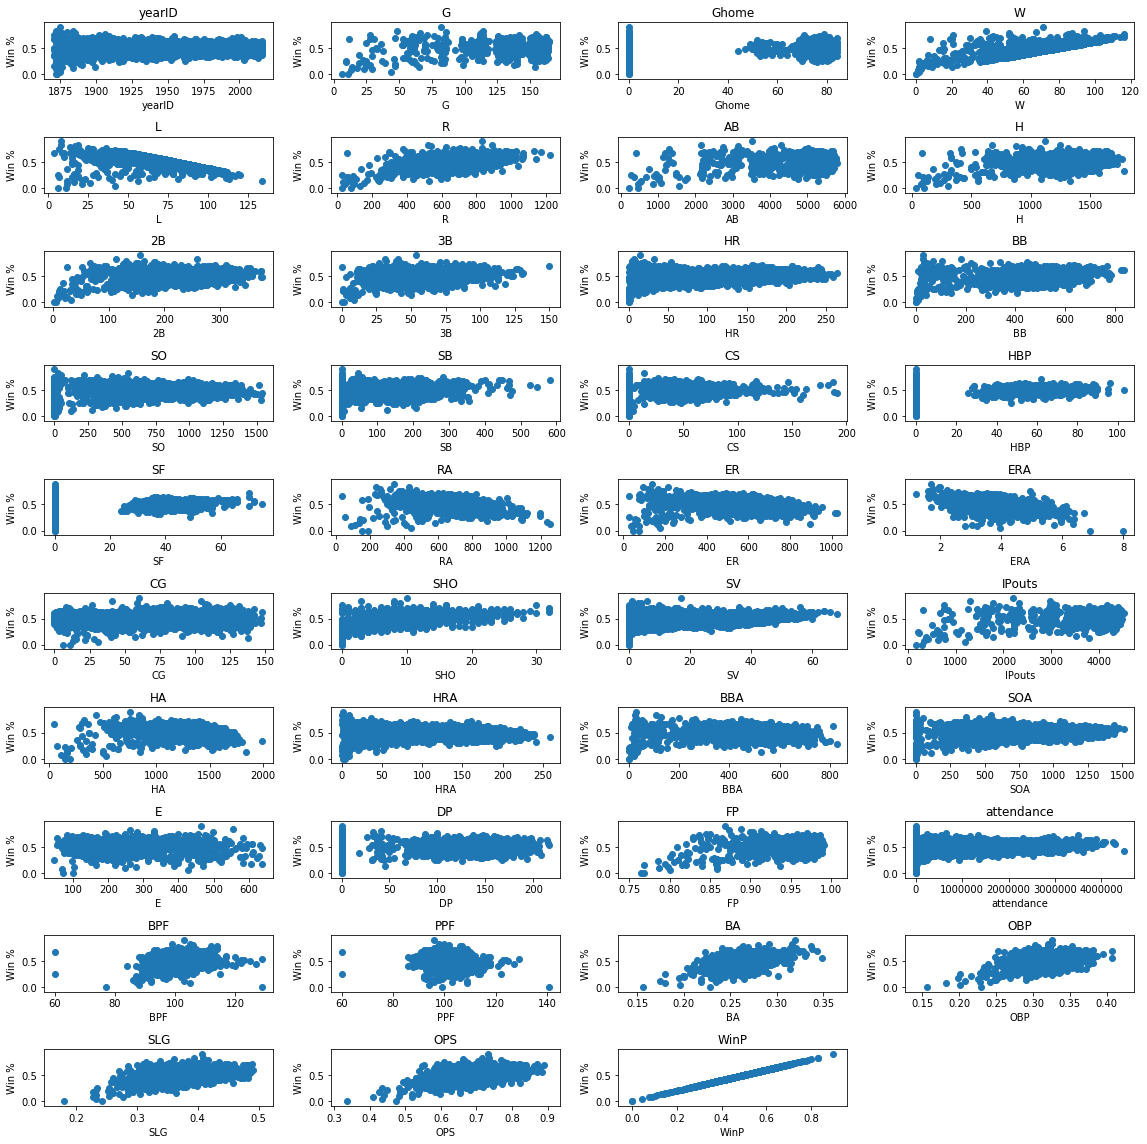

In [29]:
# Scatter Subplot of Numeric Columns
fig = plt.figure(figsize=(16,16))

#Make for loop that will plot Numeric Columns vs Win Percentage

for i, col in enumerate(teams_num):
    fig.add_subplot(10,4, 1+i)
    #print(i, col) #Use this to check index & column
    plt.scatter(teams_num[col], teams['WinP'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Win %')    

plt.tight_layout() #Prevents overlapping!     


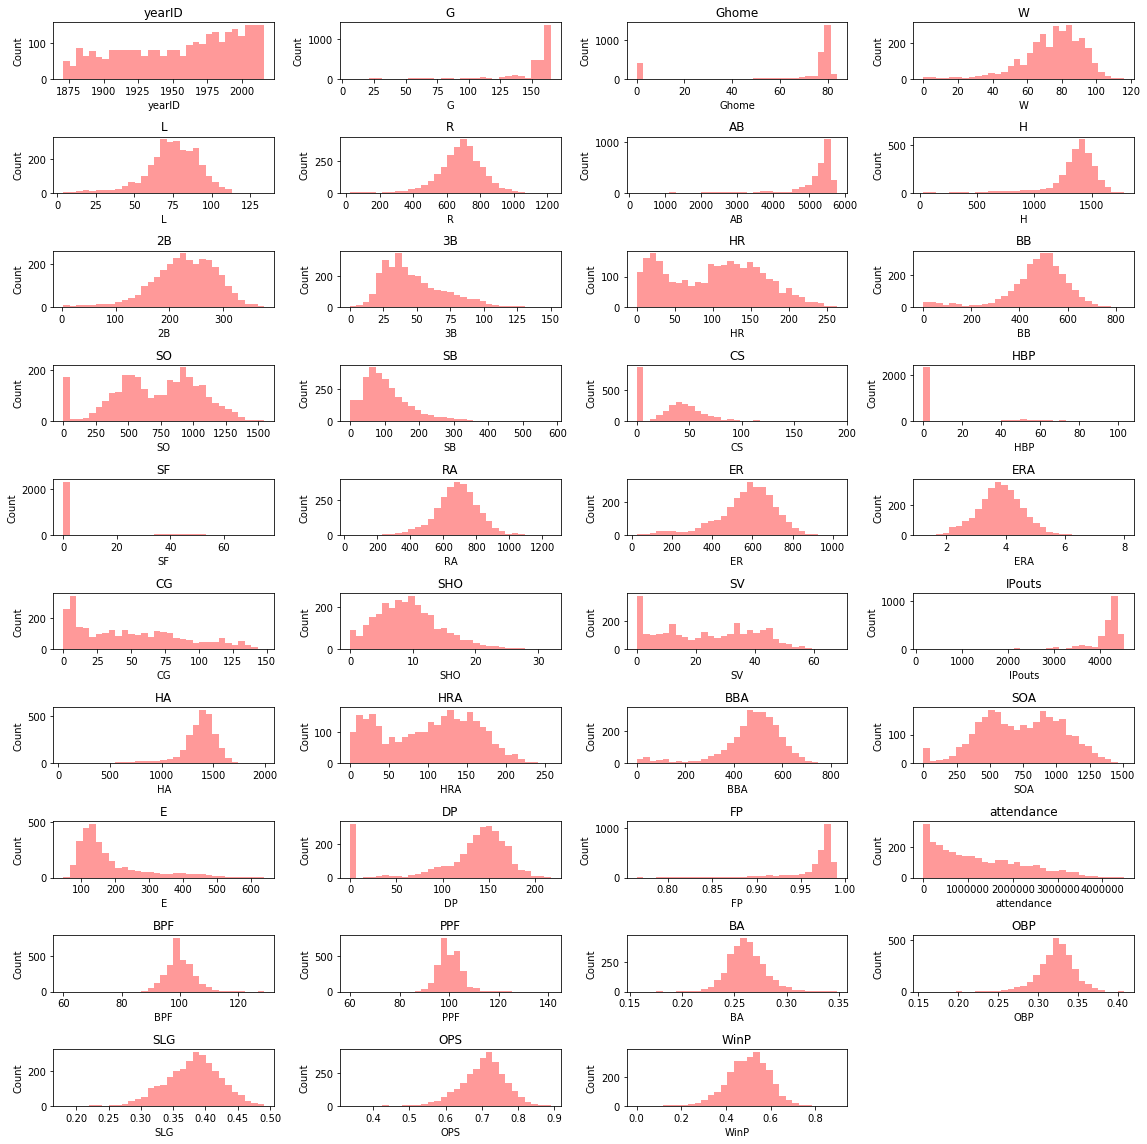

In [30]:
# Histogram Subplot of Numeric Columns
fig = plt.figure(figsize=(16,16))

#Make for loop that will plot Numeric Columns

for i, col in enumerate(teams_num):
    fig.add_subplot(10,4, 1+i)
    #print(i, col) #Use this to check index & column
    sns.distplot(teams_num[col], bins=31, kde=False, norm_hist=False, color='r')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')    

plt.tight_layout() #Prevents overlapping!     



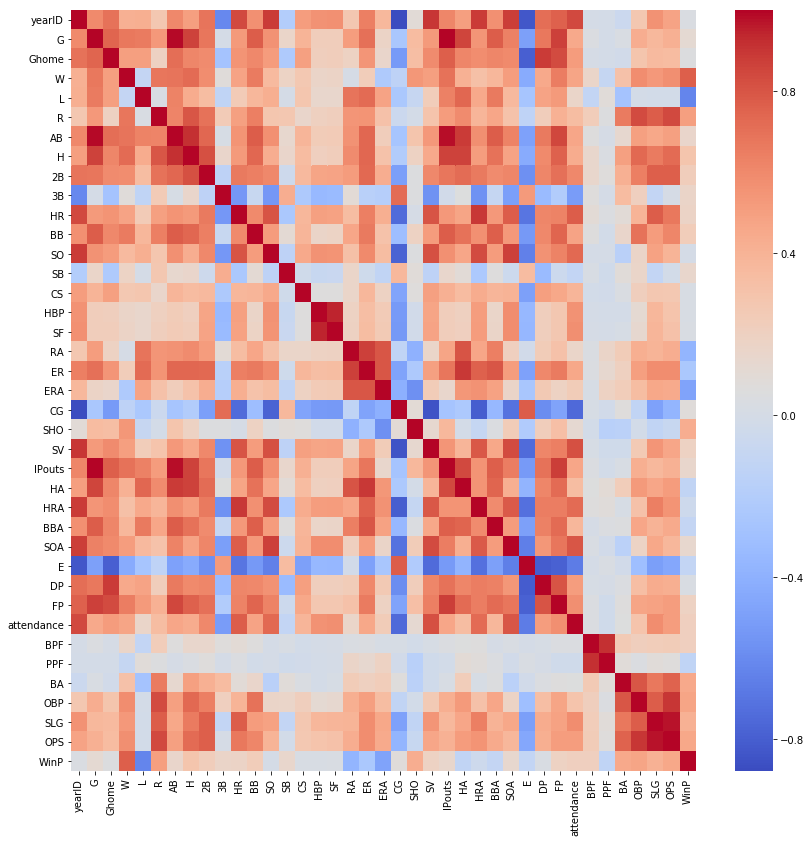

In [31]:
# Heatmap for correlation of all Numeric Features

fig = plt.figure(figsize=(14,14))
sns.heatmap(teams_num.corr(), cmap="coolwarm")

# Set cmap to coolwarm.  Look at Red & Blue for stronger correlations

### Interesting Observations:
* Attendance has negative Correlation to Errors, CG, and Triples
* YearID has negative Correlation to Errors, CG, and Triples.
* Sacrifice Fly has a positive Correlation to Hit By Pitch.
* OBP and OPS are stronger positive Correlation to Runs than BA!
* Triples have negative Correlation to YearID, HR, HRA, SO, and attendance.


### Let's look at some single metrics

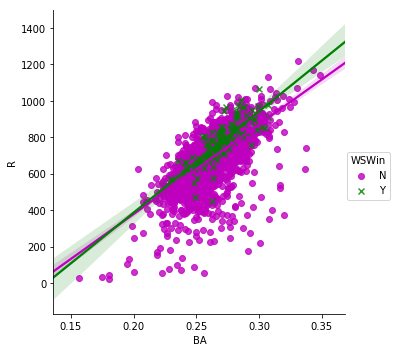

In [34]:
# Plot of comparison of World Series Winners vs. The Rest on BA vs. Runs.
ax12 = sns.lmplot(x='BA', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"), markers=["o", "x"])
# Much Better

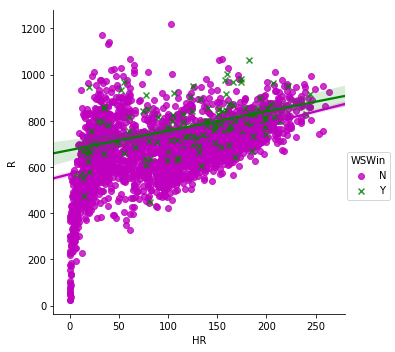

In [35]:
# Plot of comparison of World Series Winners vs. The Rest on HR vs. Runs.
ax22 = sns.lmplot(x='HR', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"), markers=["o", "x"])

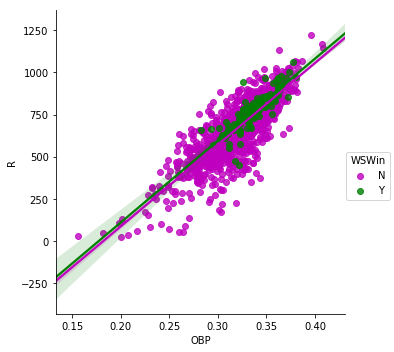

In [36]:
# Plot of comparison of World Series Winners vs. The Rest on OBP vs. Runs.
ax32 = sns.lmplot(x='OBP', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

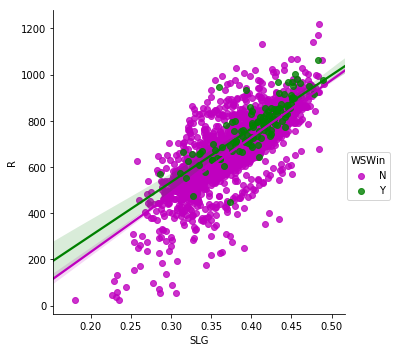

In [37]:
# Plot of comparison of World Series Winners vs. The Rest on SLG vs. Runs.
ax41 = sns.lmplot(x='SLG', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

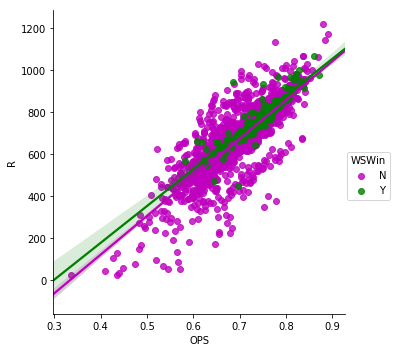

In [38]:
# Plot of comparison of World Series Winners vs. The Rest on OPS vs. Runs.
ax41 = sns.lmplot(x='OPS', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

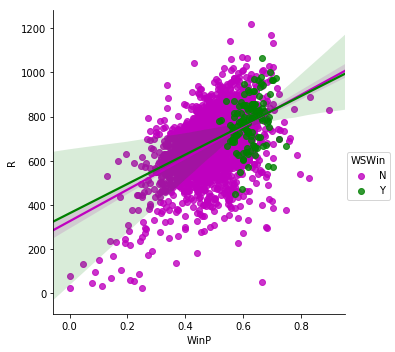

In [39]:
# Plot of comparison of World Series Winners vs. The Rest on WinP vs. Runs.
ax51 = sns.lmplot(x='WinP', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

### What about Pitching and Fielding Stats?

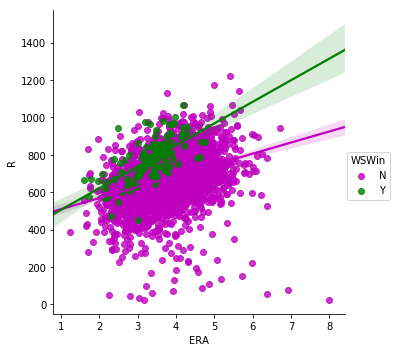

In [40]:
# Plot of comparison of World Series Winners vs. The Rest on ERA vs. Runs.
ax61 = sns.lmplot(x='ERA', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

# The World Series Winners tend to have Lower ERA and Higher Runs!

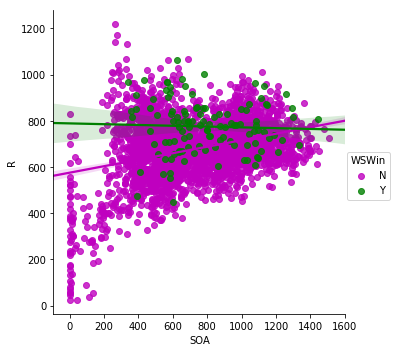

In [41]:
# Plot of comparison of World Series Winners vs. The Rest on SOA vs. Runs.
ax71 = sns.lmplot(x='SOA', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

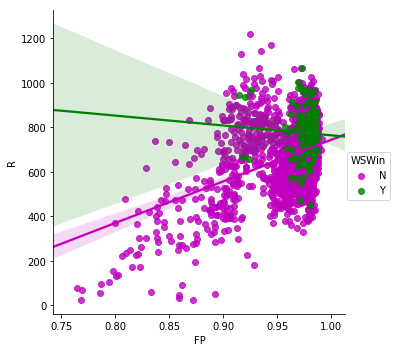

In [42]:
# Plot of comparison of World Series Winners vs. The Rest on Fielding Percentage vs. Runs.
ax81 = sns.lmplot(x='FP', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

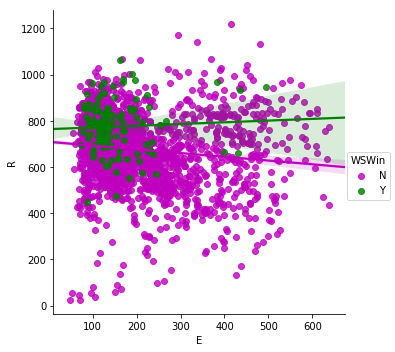

In [43]:
# Plot of comparison of World Series Winners vs. The Rest on Errors vs. Runs.
ax91 = sns.lmplot(x='E', y='R', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

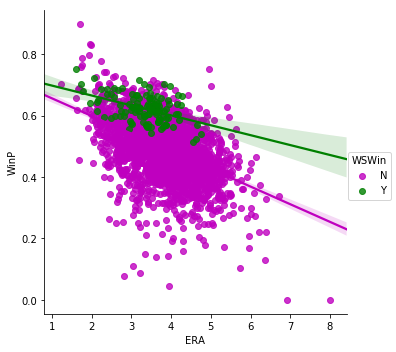

In [44]:
# How does ERA compare to Winning Percentage?

ax101 = sns.lmplot(x='ERA', y='WinP', hue='WSWin', data=teams, palette=dict(Y="g", N="m"))

# Yes starting to see some separation, but not all teams with Low ERA and High WinP will win WS!

![jordan](https://onblastpodcast.files.wordpress.com/2014/10/michael-jordan-rings.jpg "Remember what really matters...")

### Not widely known as a baseball player... but he knows what matters...

### Now Change Y and N values to 1 and 0

In [45]:
teams.replace(['Y', 'N'], [1, 0], inplace=True)

In [46]:
teams.head(5) # Check to make sure .replace did what I wanted

,yearID,teamID,franchID,G,Ghome,W,L,LgWin,WSWin,R,...,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,BA,OBP,SLG,OPS,WinP
0,1871,BS1,BNA,31,0.0,20,10,0,0,401,...,103,98,BOS,BS1,BS1,0.310496,0.339385,0.422012,0.761397,0.666667
1,1871,CH1,CNA,28,0.0,19,9,0,0,302,...,104,102,CHI,CH1,CH1,0.270067,0.304936,0.373746,0.678682,0.678571
2,1871,CL1,CFC,29,0.0,10,19,0,0,249,...,96,100,CLE,CL1,CL1,0.276560,0.292079,0.391231,0.683310,0.344828
3,1871,FW1,KEK,19,0.0,7,12,0,0,137,...,101,107,KEK,FW1,FW1,0.238606,0.270860,0.293566,0.564426,0.368421
4,1871,NY2,NNA,33,0.0,16,17,0,0,302,...,90,88,NYU,NY2,NY2,0.287037,0.303410,0.349715,0.653125,0.484848


### Now Pickle Time

In [47]:
teams.to_pickle('data/teams.p')

In [48]:
# to next notebook

![jordanbaseball](https://s-media-cache-ak0.pinimg.com/originals/ef/02/eb/ef02ebf269f0cf4184505426d98eef1e.jpg "He really did play...")